# Assignment 3: Building Time Series Forecasts

**Student Name:** Jemiran Hunter

**Date:** 2/14/2026

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

Next, import the required libraries.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [3]:
# Load the datasets
# TODO Load all three required CSV files
train_df = pd.read_csv(r"C:\Users\Ekaza-BTG PC4\time_series-analysis_forecasting_project\data\train.csv")  # Replace with pd.read_csv('data/train.csv')
holidays_df = pd.read_csv(r"C:\Users\Ekaza-BTG PC4\time_series-analysis_forecasting_project\data\holidays_events.csv")  # Replace with pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv(r"C:\Users\Ekaza-BTG PC4\time_series-analysis_forecasting_project\data\stores.csv")  # Replace with pd.read_csv('data/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    # TODO Display the first few rows

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:

CHECKPOINT: Verify datasets loaded correctly
Train data shape: (3000888, 6)
Holidays data shape: (350, 6)
Stores data shape: (54, 5)


### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [10]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city

    
    print("\nStore information:")
    print(stores_df.head(10))  # Display the first 10 rows of the stores dataset
    print("\nStore types available:")
    print(stores_df['type'].value_counts())  # Display store types to help choose a store
    print("\nStore Information Summary:")
    print(stores_df.info())  # Display info about the stores dataset to understand its structure

Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
Name: count, dtype: int64

Store information:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1    

---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [26]:
# TODO Select your store and product family
selected_store = 5  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'POULTRY'  # Replace with the product family you selected (e.g., 'PRODUCE')



print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")


Selected Store: 5
Product Family 1: POULTRY


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [27]:
# TODO Filter train_df for selected store and date range 2016-01-01 to 2017-08-15

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

# TODO Create filtered datasets for each product family
product1_data = train_df[(train_df['store_nbr'] == selected_store) &
                         (train_df['family'] == product_family_1) &
                         (train_df['date'] >= start_date) &
                         (train_df['date'] <= end_date)]

print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: (592, 6)


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [29]:
# TODO Group by date and sum sales for each product family
# TODO Create a complete date range and fill missing dates with 0 sales

# Example structure (replace with your implementation):
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)


date_range = pd.date_range(start=start_date, end=end_date, freq='D')
product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)  # Replace with time series for your selected product

print("CHECKPOINT: Time series created successfully")

CHECKPOINT: Time series created successfully


### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

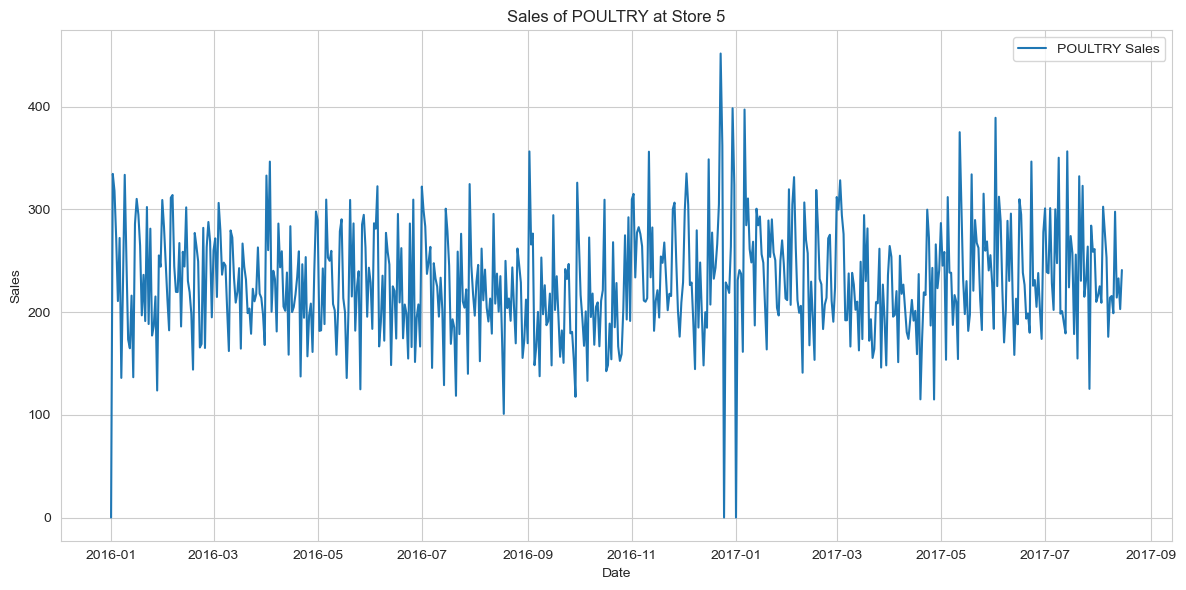

In [30]:
# Plot Product 1
# TODO Plot product1_ts on a line chart as a time series
plt.figure(figsize=(12, 6))
plt.plot(product1_ts, label=f'{product_family_1} Sales')
plt.title(f'Sales of {product_family_1} at Store {selected_store}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 
- What contrasts do they represent? 
- Why will they be interesting to compare?

I chose 'Poultry' because I believe that it is major product being produced and it would be interesting to track the transactions over time. It seems from day to day the transactions vary often up and down throughout the single day. The aggreagte will help reduce the daily noise and should give a more consistent line to view.  

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [32]:
# TODO Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()  # Replace with product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30).mean()  # Replace with product1_ts.rolling(window=30).mean()

print("CHECKPOINT: Moving averages calculated successfully")

CHECKPOINT: Moving averages calculated successfully


### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

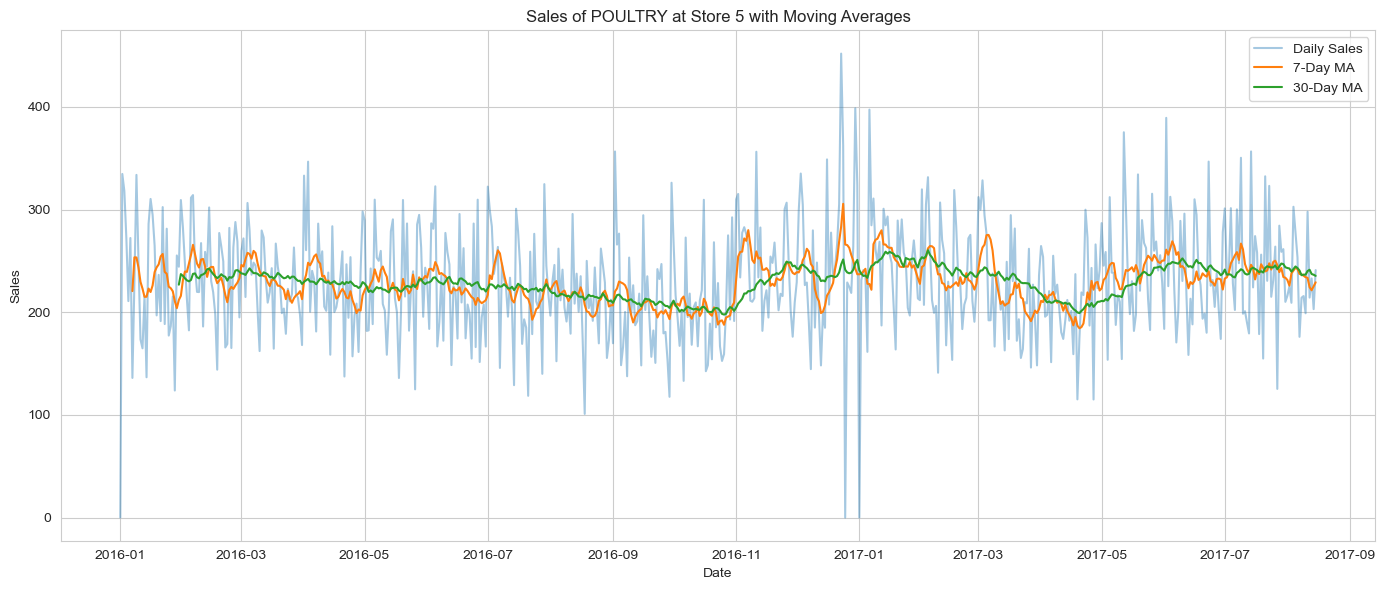

In [33]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO Plot original, 7-day MA, and 30-day MA for product 1
# axes[0].plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales')
# axes[0].plot(product1_ma7.index, product1_ma7.values, label='7-Day MA')
# axes[0].plot(product1_ma30.index, product1_ma30.values, label='30-Day MA')

axes.plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales')
axes.plot(product1_ma7.index, product1_ma7.values, label='7-Day MA')
axes.plot(product1_ma30.index, product1_ma30.values, label='30-Day MA')
axes.set_title(f'Sales of {product_family_1} at Store {selected_store} with Moving Averages')
axes.set_xlabel('Date')
axes.set_ylabel('Sales')
axes.legend()


plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [34]:
# Merge with holidays to explain trend changes
# TODO Convert holidays_df date to datetime and filter for your date range
if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    relevant_holidays = holidays_df[(holidays_df['date'] >= start_date) & (holidays_df['date'] <= end_date)]
    
    # TODO Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    print(relevant_holidays)

Key holidays/events in the period:
          date        type    locale locale_name  \
211 2016-01-01     Holiday  National     Ecuador   
212 2016-02-08     Holiday  National     Ecuador   
213 2016-02-09     Holiday  National     Ecuador   
214 2016-03-02     Holiday     Local       Manta   
215 2016-03-25     Holiday  National     Ecuador   
..         ...         ...       ...         ...   
322 2017-07-25  Additional     Local   Guayaquil   
323 2017-08-05     Holiday     Local  Esmeraldas   
324 2017-08-10     Holiday  National     Ecuador   
325 2017-08-11    Transfer  National     Ecuador   
326 2017-08-15     Holiday     Local    Riobamba   

                                description  transferred  
211                      Primer dia del ano        False  
212                                Carnaval        False  
213                                Carnaval        False  
214                      Fundacion de Manta        False  
215                           Viernes Santo  

### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: Overall the trend line is stable with some growing patterns throughout. 
- Key trend changes: 2016-11 there was a big spike in growth, another spike again just before 2017-01, and then we see the trend like begins to settle and stay consistent from 2017-05 onward.
- Holiday correlations: National holidays seem to have some impact on sales.
- Business implications: These trends could indicate that the stores should plan to have some extra inventory during these days, sale campaigns, or bundle deals.

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

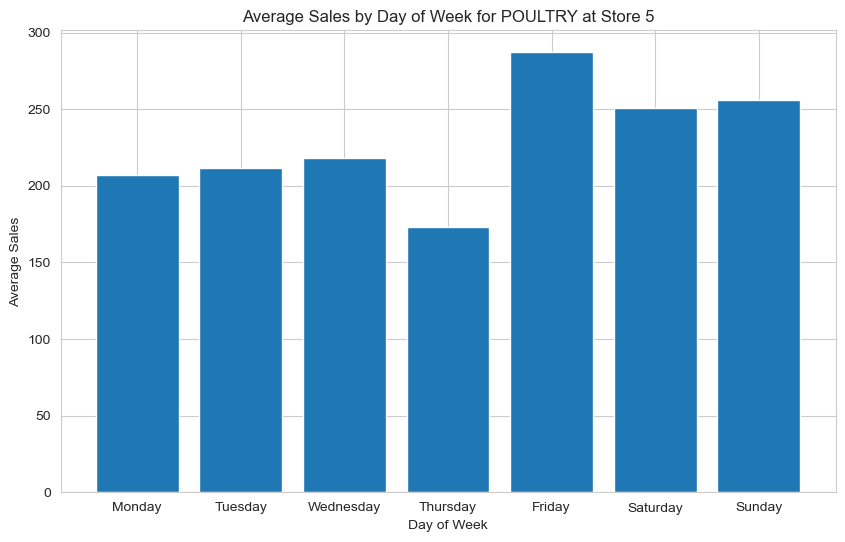

In [47]:
# Analyze day-of-week patterns
# TODO Add day of week to your data and calculate average sales by day
# Convert series to DataFrame so we can add columns
product1_dow = product1_ts.to_frame(name='sales')

# Add day of week
product1_dow['day_of_week'] = product1_dow.index.day_name()
# Group by day of week and calculate mean sales
product1_dow_avg = product1_dow.groupby('day_of_week', sort=False)['sales'].mean()

# Create bar plot comparing weekday patterns
# TODO Create bar plot showing average sales by day of week
plt.figure(figsize=(10, 6))
product1_dow_avg = product1_dow_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.bar(product1_dow_avg.index, product1_dow_avg.values)
plt.title(f'Average Sales by Day of Week for {product_family_1} at Store {selected_store}')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.show()




### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

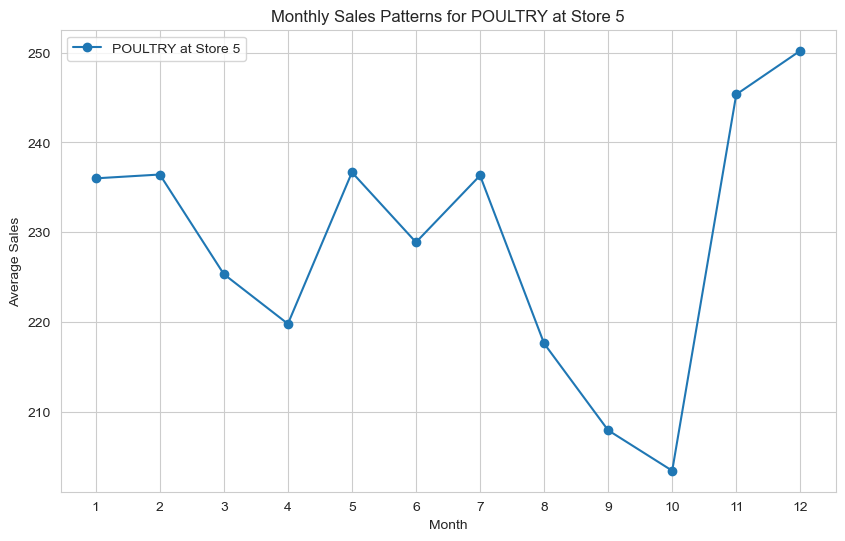

In [37]:
# Analyze monthly patterns
# TODO Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_ts.to_frame(name='sales')
product1_monthly['month'] = product1_monthly.index.month
product1_monthly_avg = product1_monthly.groupby('month')['sales'].mean()

# Create visualization
# TODO Create line plot showing monthly patterns for both products
plt.figure(figsize=(10, 6))
plt.plot(product1_monthly_avg.index, product1_monthly_avg.values, marker='o', label=f'{product_family_1} at Store {selected_store}')
plt.title(f'Monthly Sales Patterns for {product_family_1} at Store {selected_store}')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.legend()
plt.show()

### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

Average sales on holidays: 234.49
Average sales on non-holidays: 228.28


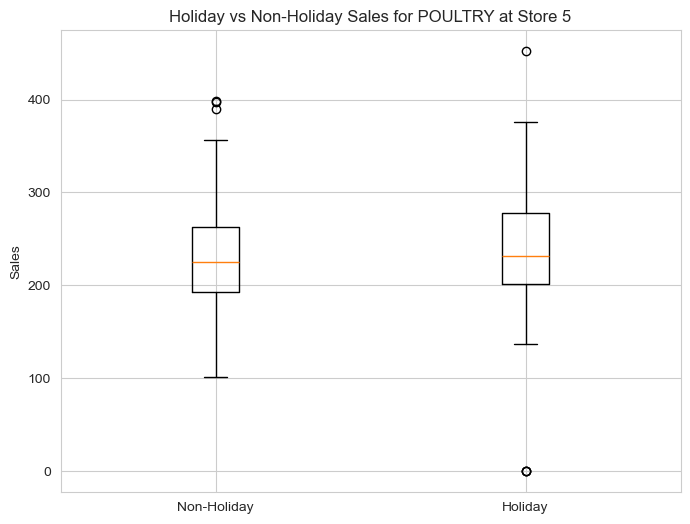

In [48]:
# Analyze holiday vs non-holiday sales
# TODO Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = holidays_df['date'].unique()  # Extract unique dates from holidays_df

# Calculate average sales on holidays vs non-holidays for both products
# TODO Split data into holiday and non-holiday sales and compare
product1_holiday_sales = product1_ts[product1_ts.index.isin(holiday_dates)]
product1_non_holiday_sales = product1_ts[~product1_ts.index.isin(holiday_dates)]

print(f"Average sales on holidays: {product1_holiday_sales.mean():.2f}")
print(f"Average sales on non-holidays: {product1_non_holiday_sales.mean():.2f}")

# Plot a boxplot comparing holiday vs non-holiday sales
# TODO Create boxplot to visualize holiday vs non-holiday sales
plt.figure(figsize=(8, 6))
data_to_plot = [product1_non_holiday_sales.values, product1_holiday_sales.values]
plt.boxplot(data_to_plot, labels=['Non-Holiday', 'Holiday'])
plt.title(f'Holiday vs Non-Holiday Sales for {product_family_1} at Store {selected_store}')
plt.ylabel('Sales') 
plt.show()

### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

The day of the week with the highest sales is Friday and the lowest day of sales is Thursday. The monthly patterns indicate that there is a decline toward the end of summer and beginning of fall months and in November there is a big jump in sales. The holidays affect the products differently due to needs, if there is an alternate product during that time, and gifts. Business dicussions could be about product sales and inventory. Business decision makers could strategize store marketing during the holidays to influence customers. 

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

In [40]:
# Perform seasonal decomposition
# TODO Use seasonal_decompose to separate trend, seasonal, and residual components


# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)  # seasonal_decompose(product1_ts, model='additive', period=7)

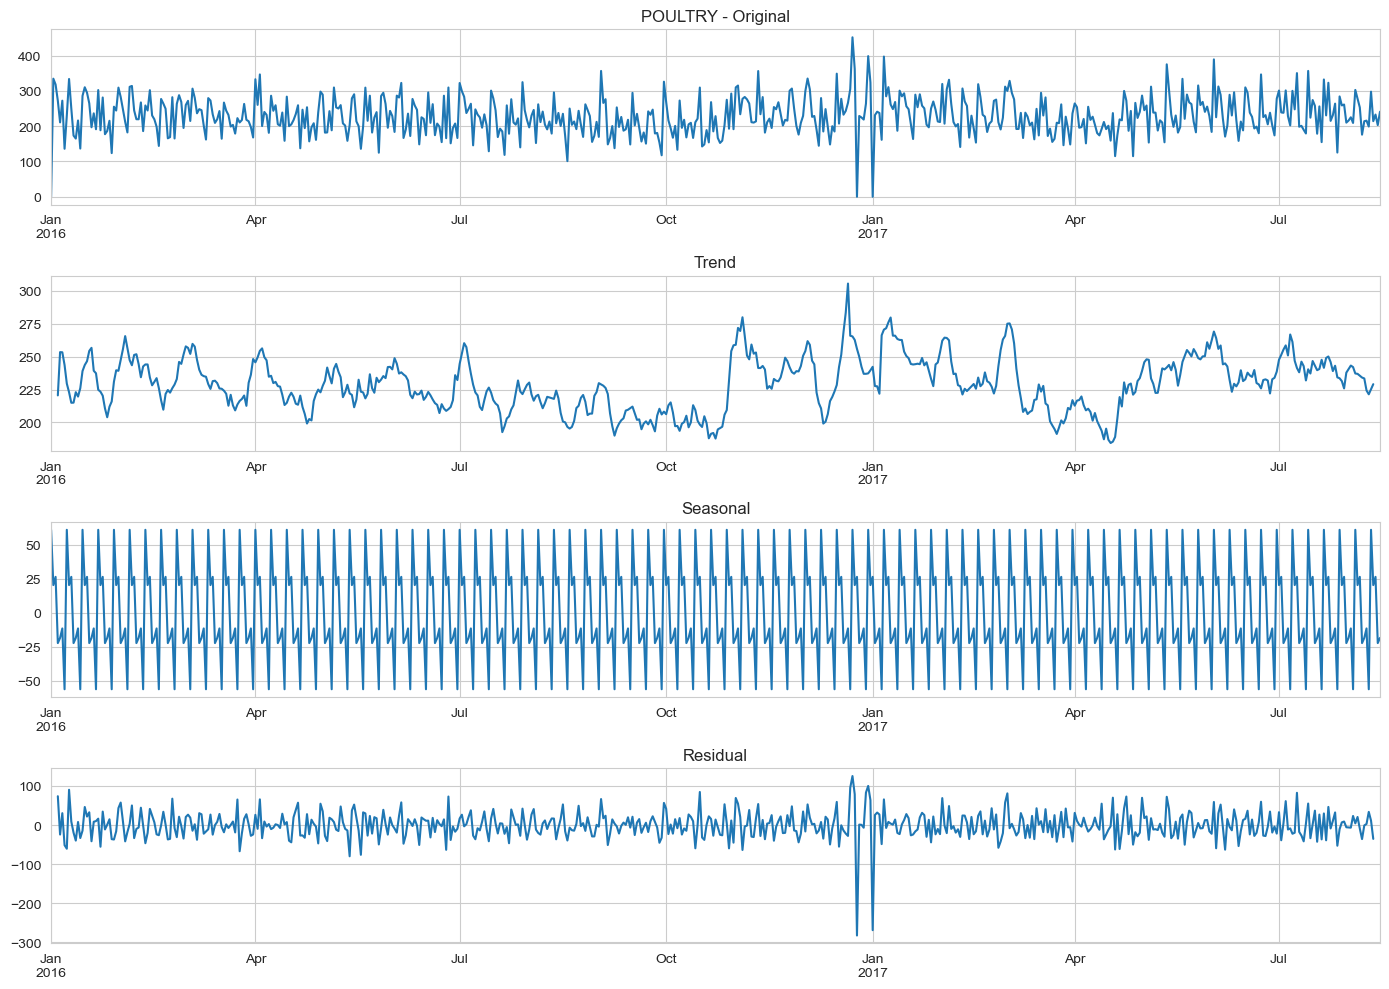

In [41]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO Plot each component
    # decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    # decomposition1.trend.plot(ax=axes[1], title='Trend')
    # decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    # decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal') 
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [42]:
# Split data for validation
test_days = 30
train = product1_ts[:-test_days] # product1_ts[:-test_days]
test = product1_ts[-test_days:] # product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [43]:
# Calculate RMSE for both methods
# TODO Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))  # np.sqrt(mean_squared_error(test1, baseline_forecast1)
seasonal_rmse = np.sqrt(mean_squared_error(test, seasonal_naive_forecast))  # np.sqrt(mean_squared_error(test1, seasonal_naive_forecast))

In [44]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)

# TODO Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['Improvement (%)'] = 100 * (baseline_rmse - seasonal_rmse) / baseline_rmse


print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print("="*80)
# TODO Display comparison table
print(comparison_df)


print("="*80)


FORECAST PERFORMANCE COMPARISON
                          Method       RMSE  Improvement (%)
0                 30-Day Average  46.802082         16.70085
1  Seasonal Naive (7-day repeat)  38.985736         16.70085


### Visualize Forecasts

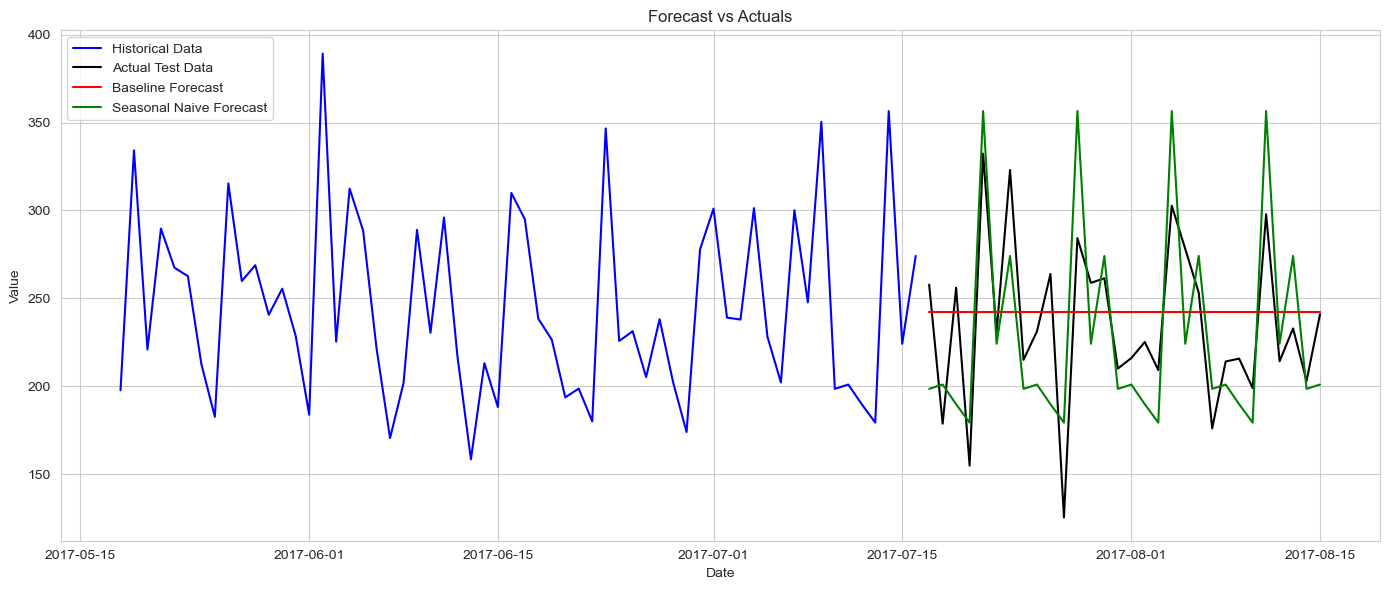

In [45]:
# Plot actual vs forecasted values
# TODO Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))

# Plot historical data (last 60 days of train)
plt.plot(train.index[-60:], train[-60:], label='Historical Data', color='blue')

# Plot actual test data
plt.plot(test.index, test, label='Actual Test Data', color='black')

# Plot baseline forecast
plt.plot(test.index, baseline_forecast, label='Baseline Forecast', color='red')

# Plot seasonal naive forecast
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast', color='green')

plt.legend()
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

**Summary**

I notice that the 'Poultry' product had a few days sales declined but overall remained to perform well at a steady pace with a couple of days spiking higher than usual with the higher performing days happening on Fridays while Thursdays are the lower performing days. In the early fall 'Poultry' seems to decline a bit but at the beginning of November it spikes and is performing back to normal. Periods that require attention are usually earlier in the week Monday-Thursday and the early fall months. When it comes to products that are more predictable than others holiday needs should be considered where as poultry is not holiday specific, like other products such as egg nog. The store manager could look to strategize during peak days of the week, adjusting store plan-o-grams to influcence marketing, put together deals during slow seasons, and plan for inventory during peak months of high sales. 

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.